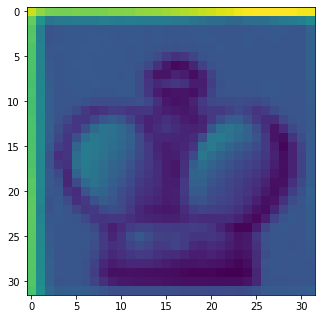

In [3]:
# generate training images

import cv2
import os

import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import ndimage
import math
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import chess
import chess.svg

from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

from utils import distance, generate_img, random_warp, fen_to_labels, split_chessboard

d = np.random.randint(low=64, high=256)
fen = '5k2/ppq5/4P3/3Q3p/6P1/1K2Nr2/PP3P2/8'

i_board = np.random.randint(low=1, high=28)
i_piece = random.choice( list([1,2,3,5,6, 10,16, 20,26,28, 31,32]) )

img = generate_img(fen, large_dim=d, i_board=i_board, i_piece=i_piece)

img = cv2.resize( img, (256, 256), interpolation = cv2.INTER_AREA )
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

desaturation_weight = np.random.uniform(low=0, high=0.4)
img = random_warp(img, thr=3, desaturation_weight=desaturation_weight)

labels = fen_to_labels(fen)
imgs = split_chessboard(img)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.imshow(imgs[5])

plt.show()


In [49]:
# generate training images

import cv2
import os

import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import ndimage
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import chess
import chess.svg

from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

from utils import distance, generate_img, random_warp, fen_to_labels, split_chessboard

fens = pd.read_csv('C:/Users/dimaz/Documents/Chess piece values analysis/chessData db/chessDataProcessed.csv')

train  = []
test   = []

i = 0

for fen in list(fens.loc[:, 'FEN'])[:400]:

    fen = fen.split()[0]

    d = np.random.randint(low=64, high=256)
    i_board = np.random.randint(low=1, high=28)
    i_piece = random.choice( list([1,2,3,5,6, 10,16, 20,26,28, 31,32]) )

    img = generate_img(fen, large_dim=d, i_board=i_board, i_piece=i_piece)

    img = cv2.resize( img, (256, 256), interpolation = cv2.INTER_AREA )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    desaturation_weight = np.random.uniform(low=0, high=0.4)
    img = random_warp(img, thr=3, desaturation_weight=desaturation_weight)

    labels = fen_to_labels(fen)
    imgs = split_chessboard(img)

    for lbl, img in zip(labels, imgs):

        fname = f'data/{lbl}_{i}.jpg'

        cv2.imwrite(fname, img)
        
        if np.random.rand() > 0.2:
            train.append(fname)
        else:
            test.append(fname)

        if i % 1000 == 0: print(i)

        i += 1

# save train & test files
train_txt = str('\n'.join(train))
test_txt = str('\n'.join(test))

with open(f'train.txt', 'w') as f:
    f.write(train_txt)
    f.close()

with open(f'test.txt', 'w') as f:
    f.write(test_txt)
    f.close()

print('Done')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
Done
